In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 128
BATCH_SIZE = 16
EPOCHS = 10

In [7]:
import tensorflow as tf
dataset_path = r"C:\Users\gowri\OneDrive\Desktop\plant vilage\PlantVillage"

selected_classes = ['Potato___Late_blight',
                    'Potato___healthy',
                    'Potato___Early_blight'
                    ]
# Load only specified classes
dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='int',
    class_names=selected_classes,
    image_size=(256, 256),
    batch_size=BATCH_SIZE  # Use the new lower batch size
)


# Display loaded class names
print("Loaded Classes:", dataset.class_names)

Found 2152 files belonging to 3 classes.
Loaded Classes: ['Potato___Late_blight', 'Potato___healthy', 'Potato___Early_blight']


In [9]:
class_name = dataset.class_names
class_name

['Potato___Late_blight', 'Potato___healthy', 'Potato___Early_blight']

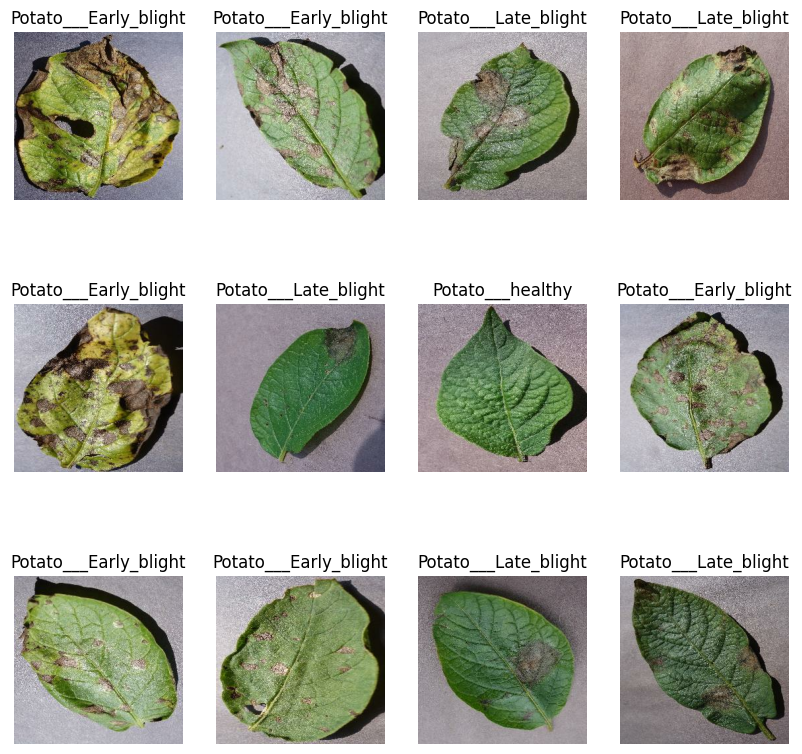

In [11]:
plt.figure(figsize= (10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis('off')

In [13]:
train_size = 0.8
len(dataset)*train_size

108.0

In [15]:
train_ds = dataset.take(100)
len(train_ds)

100

In [19]:
test_ds = dataset.skip(100)
len(test_ds)

35

In [21]:
val_size = 0.1
len(dataset)*val_size

13.5

In [23]:
test_ds = test_ds.skip(14)
len(test_ds)

21

In [25]:
def get_dataset_partition_tf(ds, train_split = 0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size =  len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.take(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [27]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [29]:
len(train_ds)

108

In [31]:
len(val_ds)

13

In [33]:
len(test_ds)

14

In [35]:
train_ds = train_ds.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [37]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

In [39]:
from tensorflow.keras import layers, models
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

model = models.Sequential([
    layers.Rescaling(1.0 / 255, input_shape=(256, 256, 3)),  # Normalize & define input shape
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.GlobalAveragePooling2D(),  # Efficient downsampling
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # You have 10 classes
])


C:\Users\gowri\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=SparseCategoricalCrossentropy(from_logits=False),  # Correct loss for integer labels
    metrics=['accuracy']
)


In [47]:
history = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
    verbose=1
)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.4921 - loss: 1.0128 - val_accuracy: 0.4904 - val_loss: 0.8464
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 107s 973ms/step - accuracy: 0.4906 - loss: 0.8908 - val_accuracy: 0.5240 - val_loss: 0.8275
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.6264 - loss: 0.8334 - val_accuracy: 0.7260 - val_loss: 0.7644
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 108s 989ms/step - accuracy: 0.7056 - loss: 0.7315 - val_accuracy: 0.7692 - val_loss: 0.6362
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.7489 - loss: 0.6463 - val_accuracy: 0.7308 - val_loss: 0.7164
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 108s 984ms/step - accuracy: 0.7711 - loss: 0.6006 - val_accuracy: 0.7740 - val_loss: 0.6018
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 106s 969ms/step - accuracy: 0.7872 - loss: 0.5584 - val_accuracy: 0.7404 - val_loss: 0.5566
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 107s 973ms/step - accuracy: 0.8019 - loss: 0.

In [49]:
# Save the entire model
model.save("potato_disease_model.h5")

In [61]:
import matplotlib.pyplot as plt

# Combine history if you trained in multiple phases
# Example: history_1 + history_2
def combine_histories(*histories):
    combined_history = {
        'loss': [],
        'val_loss': [],
        'accuracy': [],
        'val_accuracy': []
    }
    for h in histories:
        combined_history['loss'] += h.history['loss']
        combined_history['val_loss'] += h.history['val_loss']
        combined_history['accuracy'] += h.history['accuracy']
        combined_history['val_accuracy'] += h.history['val_accuracy']
    return combined_history



# Plotting function
def plot_training_history(history):
    epochs = range(1, len(history['loss']) + 1)

    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['accuracy'], 'b-', label='Training Accuracy')
    plt.plot(epochs, history['val_accuracy'], 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['loss'], 'b-', label='Training Loss')
    plt.plot(epochs, history['val_loss'], 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function
plot_training_history(history)


TypeError: 'History' object is not subscriptable